In [1]:
library(Seurat)
library(SeuratData)
library(cowplot)
library(patchwork)
library(scHOT)
library(tidyverse)
library(dplyr)
library(BiocParallel)

Attaching SeuratObject

Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used

In [2]:
# Get Interferon data 
install.packages("https://seurat.nygenome.org/src/contrib/ifnb.SeuratData_3.0.0.tar.gz", repos = NULL, type = "source")

In [3]:
library(ifnb.SeuratData)
data("ifnb")

In [4]:
ifnb

An object of class Seurat 
14053 features across 13999 samples within 1 assay 
Active assay: RNA (14053 features, 0 variable features)

In [5]:
ifnb[['psuedotime']] = if_else(ifnb[['stim']] == 'CTRL', 0 , 1)

In [6]:
table(ifnb[['seurat_annotations']])


   CD14 Mono  CD4 Naive T CD4 Memory T    CD16 Mono            B        CD8 T 
        4362         2504         1762         1044          978          814 
 T activated           NK           DC  B Activated           Mk          pDC 
         633          619          472          388          236          132 
       Eryth 
          55 

In [7]:
ifnb_mono <- ifnb[,ifnb[['seurat_annotations']] == 'CD14 Mono']

In [8]:
table(str_detect(string = rownames(ifnb_mono), 'MT'))


FALSE  TRUE 
13884   169 

In [9]:
ifnb_mono[['percent.mt']] <- PercentageFeatureSet(ifnb_mono, pattern = 'MT')

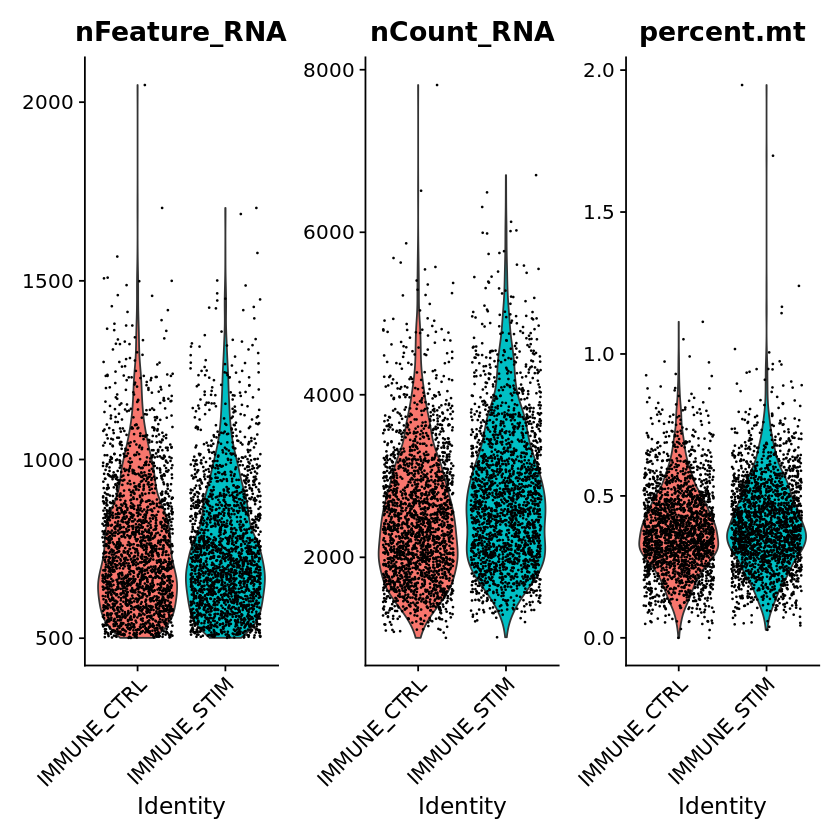

In [10]:
VlnPlot(ifnb_mono, features <- c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [11]:
plot1 <- FeatureScatter(ifnb_mono, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(ifnb_mono, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")

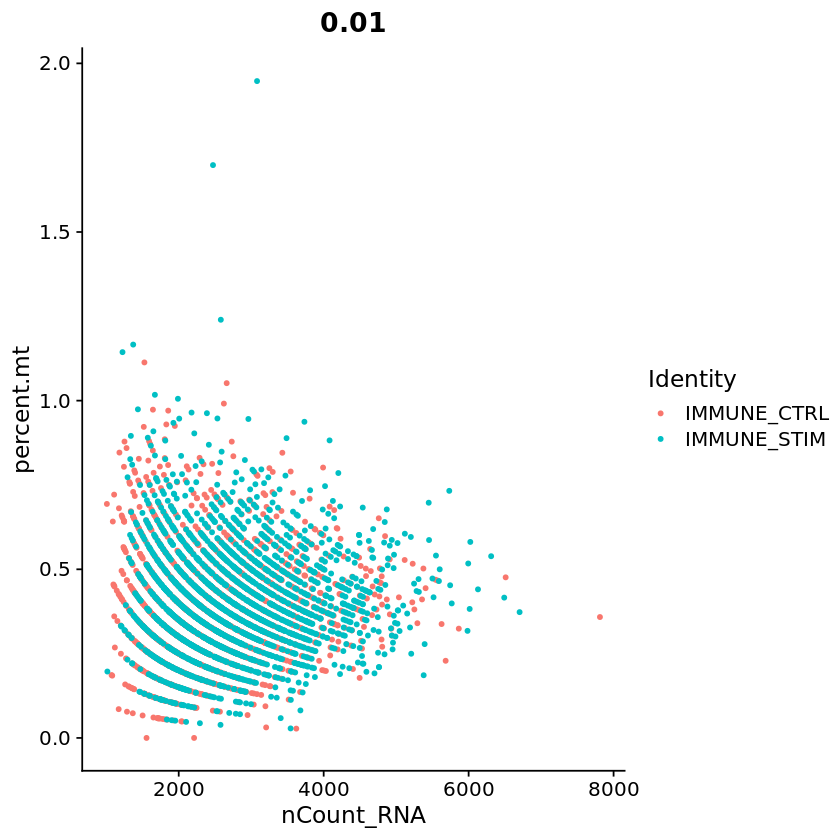

In [12]:
plot1

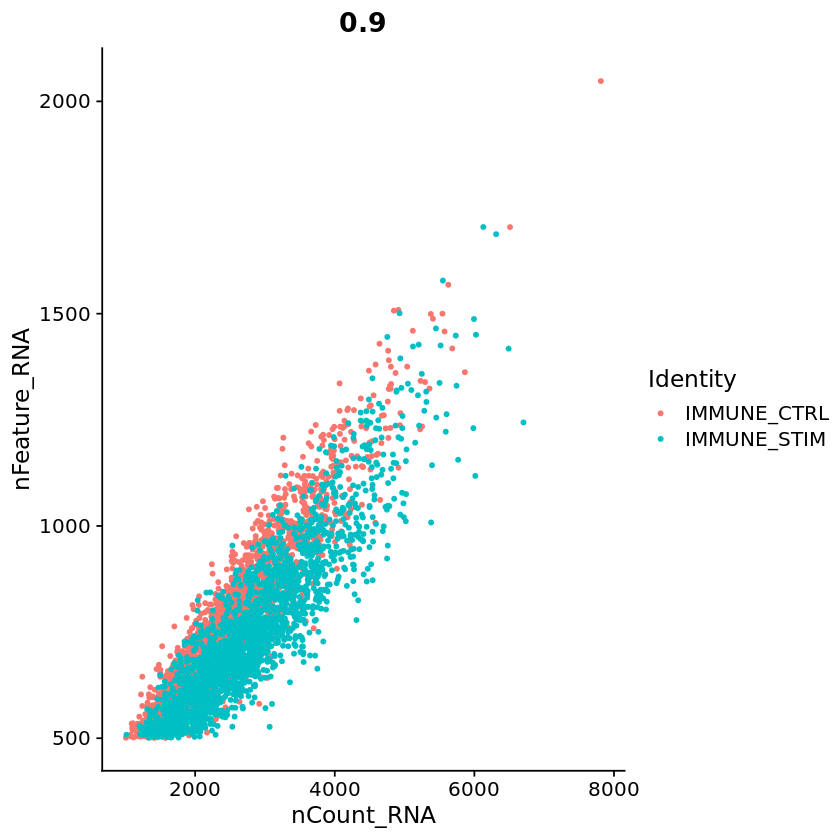

In [13]:
plot2

In [14]:
ifnb_mono <- NormalizeData(ifnb_mono, normalization.method = 'LogNormalize', scale.factor = 10000)

In [15]:
ifnb_mono

An object of class Seurat 
14053 features across 4362 samples within 1 assay 
Active assay: RNA (14053 features, 0 variable features)

In [16]:
mono_small <- subset(x = ifnb_mono, downsample = 1000)

In [17]:
mono_small

An object of class Seurat 
14053 features across 2000 samples within 1 assay 
Active assay: RNA (14053 features, 0 variable features)

In [18]:
table(mono_small$stim)


CTRL STIM 
1000 1000 

In [339]:
# mono_small[['ctrl']] = ifelse(mono_small[['stim']] == 'CTRL', 1 , 0)

In [340]:
# mono_small[['stim']] = ifelse(mono_small[['stim']] == 'STIM', 1 , 0)

In [341]:
# weight_mtx <- as.matrix(t(mono_small[[c('ctrl','stim')]]))

In [342]:
# weight_mtx

In [19]:
# building scHOT object 

scHOT_traj <- scHOT_buildFromMatrix(
  mat = as.matrix(GetAssayData(mono_small)),
  cellData = list(pseudotime = mono_small$psuedotime),
  positionType = "trajectory",
  positionColData = "pseudotime")

In [20]:
scHOT_traj

class: scHOT 
dim: 14053 2000 
metadata(0):
assays(1): expression
rownames(14053): AL627309.1 RP11-206L10.2 ... AP001062.7 LRRC3DN
rowData names(0):
colnames(2000): AAACATTGCTTCGC.1 AAACGCTGGGGATG.1 ... TTTGACTGATCACG.1
  TTTGACTGCCCACT.1
colData names(1): pseudotime
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):
testingScaffold dim: 0 0 
weightMatrix dim: 0 0 
scHOT_output colnames (0):
param names (0):
position type: trajectory 

In [21]:
dim(scHOT_traj@weightMatrix)

[1] 0 0

In [22]:
# setting Weight Matrix
scHOT_traj <- scHOT_setWeightMatrix(scHOT_traj,
                                    positionType = "trajectory",
                                    positionColData = c("pseudotime"),
                                    nrow.out = 2,
                                    averageAcrossTrajectoryTies = TRUE,
                                    span = 0.1)

weightMatrix not provided, generating one using parameter settings...

type not specified, defaulting to triangular



In [23]:
dim(scHOT_traj@weightMatrix)

[1]    2 2000

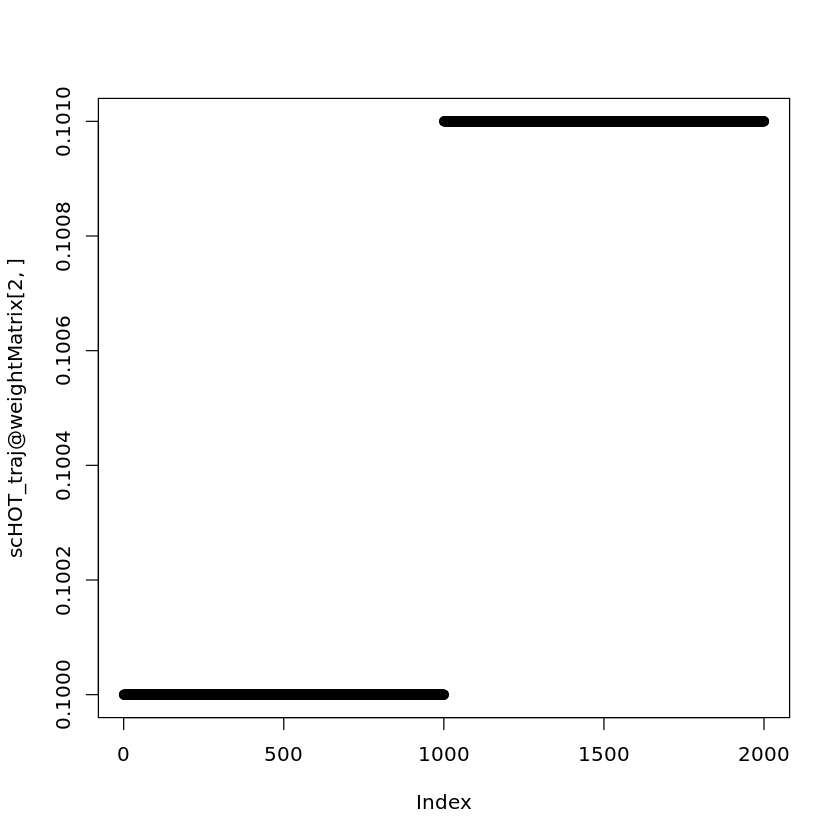

In [429]:
plot(scHOT_traj@weightMatrix[2,])

In [24]:
# randomly select 100 genes to test
gene_to_test <- as.matrix(sample(rownames(ifnb_mono), 10, replace = FALSE))

In [25]:
# ISG genes
gene_to_test <- as.matrix(c('ISG15','MX1','OASL','OAS1','MX2'))

In [26]:
dim(gene_to_test)

[1] 5 1

In [32]:
scHOT_traj

class: scHOT 
dim: 14053 2000 
metadata(0):
assays(1): expression
rownames(14053): AL627309.1 RP11-206L10.2 ... AP001062.7 LRRC3DN
rowData names(0):
colnames(2000): AAACATTGCTTCGC.1 AAACGCTGGGGATG.1 ... TTTGACTGATCACG.1
  TTTGACTGCCCACT.1
colData names(1): pseudotime
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):
testingScaffold dim: 0 0 
weightMatrix dim: 2 2000 
scHOT_output colnames (0):
param names (0):
position type: trajectory 

In [27]:
ptm <- proc.time()
# scHOT wrapper function
scHOT_traj_wrap = scHOT(scHOT_traj,
                        testingScaffold = gene_to_test,
                        weightMatrix = scHOT_traj@weightMatrix,
                        higherOrderFunction = matrixStats::weightedVar,
                        higherOrderFunctionType = "weighted",
                        numberPermutations = 100,
                        parallel = TRUE,
                        BPPARAM = BiocParallel::MulticoreParam(workers = 10),
                        verbose = FALSE
                      )
proc.time() - ptm

higherOrderFunctionType given will replace any stored param

higherOrderFunction given will replace any stored param

numberScaffold set higher than the scaffold, setting permutation number for all tests

higherOrderSummaryFunction will replace any stored param



   user  system elapsed 
 14.459   4.067   3.182 

In [28]:
head(slot(scHOT_traj_wrap, "scHOT_output"))

DataFrame with 5 rows and 14 columns
           gene_1 globalHigherOrderFunction numberPermutations
      <character>                  <matrix>          <numeric>
ISG15       ISG15                   8.01245                100
MX1           MX1                   2.11101                100
OASL         OASL                   1.52859                100
OAS1         OAS1                   1.87589                100
MX2           MX2                   1.04813                100
      storePermutations higherOrderSequence higherOrderStatistic
              <logical>       <NumericList>            <numeric>
ISG15              TRUE     1.28039,8.04560             4.783725
MX1                TRUE   0.265954,2.121310             1.311935
OASL               TRUE   0.416573,1.536567             0.791955
OAS1               TRUE   0.453298,1.884849             1.012260
MX2                TRUE   0.152616,1.054793             0.637936
                              permutations pvalPermutations FDRPerm

Warning message in plotHigherOrderSequence(scHOT_traj_wrap, gene_to_test[1:5, ]):
“Not all the cell position has higherOrderSequence statistics,
            set nrow.out = NULL in scHOT_setWeightMatrix to calculate
            higherOrderSequence for all positions!”
branches information is not provided

Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message:
“Use of `branch_long$SampleOrder` is discouraged. Use `SampleOrder` instead.”
Warning message:
“Use of `branch_long$WeightedCorrelation` is discouraged. Use `WeightedCorrelation` instead.”
Warning message:
“Use of `branch_long$GenePair` is discouraged. Use `GenePair` instead.”
Warning message:
“Use of `branch_long$GenePair` is discouraged. Use `GenePair` instead.”


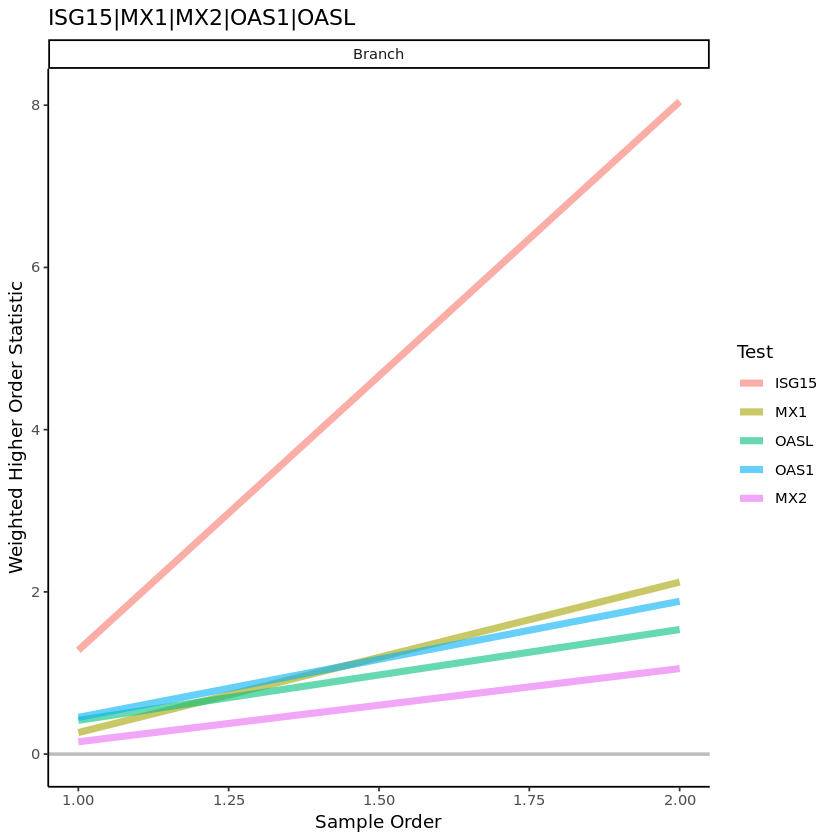

In [31]:
plotHigherOrderSequence(scHOT_traj_wrap, gene_to_test[1:5,])

In [30]:
slot(scHOT_traj_wrap, "scHOT_output")

DataFrame with 5 rows and 14 columns
           gene_1 globalHigherOrderFunction numberPermutations
      <character>                  <matrix>          <numeric>
ISG15       ISG15                   8.01245                100
MX1           MX1                   2.11101                100
OASL         OASL                   1.52859                100
OAS1         OAS1                   1.87589                100
MX2           MX2                   1.04813                100
      storePermutations higherOrderSequence higherOrderStatistic
              <logical>       <NumericList>            <numeric>
ISG15              TRUE     1.28039,8.04560             4.783725
MX1                TRUE   0.265954,2.121310             1.311935
OASL               TRUE   0.416573,1.536567             0.791955
OAS1               TRUE   0.453298,1.884849             1.012260
MX2                TRUE   0.152616,1.054793             0.637936
                              permutations pvalPermutations FDRPerm

ranked_by information is not provided,
              the expression data is ranked by the branches

branches information is not provided

Warning message:
“Use of `gdf_sub$ExpressionGene` is discouraged. Use `ExpressionGene` instead.”
Warning message:
“Use of `gdf_sub$gene` is discouraged. Use `gene` instead.”
Warning message:
“Use of `gdf_sub$gene` is discouraged. Use `gene` instead.”
Warning message:
“Use of `gdf_sub$branch` is discouraged. Use `branch` instead.”
Warning message:
“Use of `gdf_sub$branch` is discouraged. Use `branch` instead.”
Warning message:
“Use of `gdf_sub$ExpressionGene` is discouraged. Use `ExpressionGene` instead.”
Warning message:
“Use of `gdf_sub$gene` is discouraged. Use `gene` instead.”
Warning message:
“Use of `gdf_sub$gene` is discouraged. Use `gene` instead.”
Warning message:
“Use of `gdf_sub$branch` is discouraged. Use `branch` instead.”
Warning message:
“Use of `gdf_sub$branch` is discouraged. Use `branch` instead.”
`geom_smooth()` using method = 'loes

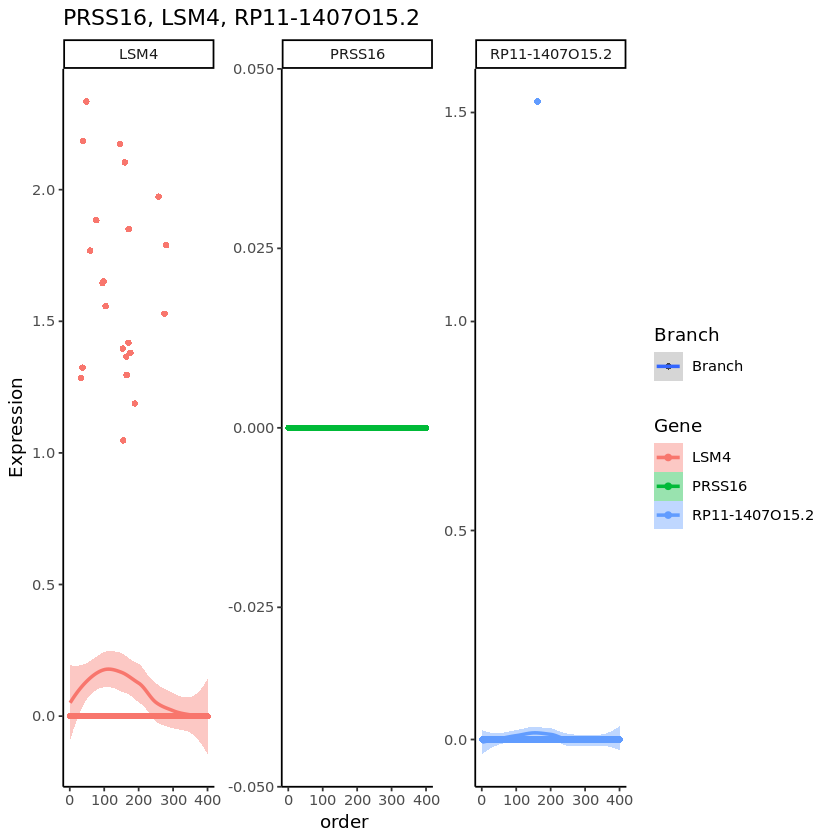

In [181]:
plotOrderedExpression(scHOT_traj_wrap, gene_to_test[1:3]) + 
  facet_wrap(~gene, scales = "free_y")

In [ ]:
# scHOT example 

In [58]:
data(liver)

liver_pseudotime_hep <- liver$liver_pseudotime_hep
liver_branch_hep <- liver$liver_branch_hep
first_branch_cells <- liver$first_branch_cells

In [65]:
liver_branch_hep[,first_branch_cells]

,E10.5D_3_02,E10.5D_2_01,E10.5D_3_03,E10.5D_2_20,E10.5D_3_09,E10.5D_3_13,E10.5D_3_04,E10.5D_3_06,E10.5D_3_01,E10.5D_3_05,⋯,E9B_E15.5,E11.5E_2_07,E12.5E_2_05,E11.5D_1_09,E12.5D_2_02,E13.5D_1_06,E12.5D_2_01,E14.5_C02,C1A_E16.5,E11.5D_2_12
2810474O19Rik,3.7600779,4.4921473,0.894055,1.2320599,0.8077063,6.6589798,6.4319111,5.9759617,6.3780019,6.7625798,⋯,2.2482665,1.594232,2.009950,4.2150579,7.8611779,5.37284272,5.443048,4.822885,8.556507,1.05908975
Abca1,6.7519939,7.1713374,7.175951,7.8163577,6.6778573,7.0269260,7.7029516,6.7051988,7.4646035,7.2415689,⋯,8.1655404,7.998203,7.260157,7.8252386,7.6500306,6.73443612,8.062216,6.087721,4.944984,8.56939042
Abcf2,5.9500451,6.8433885,6.865881,5.7077903,5.9012890,6.0928907,7.5700847,7.2271385,6.2731514,6.5478824,⋯,5.4785522,5.442325,6.566812,4.4078171,7.5414551,6.32846646,5.487366,5.026452,2.495283,6.11062390
Acss1,4.0738777,4.8614337,-1.768527,3.5987805,6.1246291,5.4438541,4.4734331,4.6721846,3.5707060,5.5709888,⋯,6.5895457,5.142460,5.778907,6.0859965,6.2498311,3.21141237,5.421101,6.351912,3.600671,6.71285571
Ado,6.1993313,5.8959861,7.195297,5.9384418,5.8562213,6.6222039,7.5197587,6.9065740,6.4465515,5.6928085,⋯,8.5237053,7.886725,6.176924,0.7506315,7.1739962,6.21955424,6.102667,5.381095,10.254483,6.60481212
Akr1c12,5.7044750,3.4611093,7.300062,7.2386476,6.1918960,6.9115616,7.0505316,6.4330055,5.7951521,4.4496647,⋯,5.3726635,4.731597,6.111425,5.3806932,6.1780686,-0.09691916,5.370013,4.343850,7.319185,-0.44188309
Akr1c13,7.4100374,6.3249150,7.385862,6.6398312,5.8012381,6.9015044,8.8510593,5.7549739,7.7554363,4.8629818,⋯,6.8916488,6.610099,7.154243,6.2964927,7.8512621,8.61280215,7.125546,6.022480,5.162203,0.01855701
Alg8,6.9230391,5.4603531,7.032451,8.0469086,5.1148444,5.0248029,4.5824949,7.0469950,6.6319435,6.8361167,⋯,8.4556382,5.502072,7.726678,5.8419727,6.6857737,6.27660095,5.344788,6.540265,8.423680,5.55370758
Apeh,-0.1618722,5.7391794,4.925397,-0.6134697,5.0586302,3.7753684,6.2539192,6.6147370,4.3746587,5.9348082,⋯,3.8622785,7.083526,6.297048,5.4011835,6.9236393,6.07401472,6.270245,5.533559,10.263879,6.36484925
Apoa2,11.6338331,11.5458097,12.080394,12.2912188,11.6442113,12.0812189,12.2660231,11.5295507,12.1793508,12.2994059,⋯,10.8171458,11.104051,11.642773,10.7383714,12.5841654,12.73564722,11.832989,12.908799,9.941576,11.45544847


In [59]:
liver_pseudotime_hep[first_branch_cells]

E10.5D_3_02 E10.5D_2_01 E10.5D_3_03 E10.5D_2_20 E10.5D_3_09 E10.5D_3_13 
  0.0000000   0.1106331   0.2001350   0.2800419   0.2980354   0.3047947 
E10.5D_3_04 E10.5D_3_06 E10.5D_3_01 E10.5D_3_05 E10.5D_3_14 E10.5D_3_15 
  0.3143735   0.3240681   0.3297694   0.3300615   0.3490173   0.3739624 
E10.5D_1_06 E10.5D_3_07 E10.5D_1_11 E10.5D_1_10 E10.5D_1_04 E10.5D_2_17 
  0.3808902   0.3817076   0.4476170   0.5010736   0.5191971   0.5246804 
E10.5D_3_10 E10.5D_2_19 E10.5D_1_15 E10.5D_1_12 E10.5D_3_16 E10.5D_3_12 
  0.5362808   0.5497638   0.5525986   0.5671261   0.5704733   0.5886783 
E10.5D_2_12 E10.5D_2_13 E10.5D_2_11 E10.5D_2_16   E11.5_C06 E10.5D_2_05 
  0.5947291   0.5970328   0.6015543   0.6282681   0.6294796   0.6378546 
E10.5D_3_08 E10.5D_2_06 E10.5D_3_11 E10.5D_1_03 E10.5D_2_10 E10.5D_1_08 
  0.6734096   0.6778921   0.6787616   0.6862188   0.7033914   0.7077567 
E10.5D_1_13 E10.5D_2_04 E10.5D_2_03 E10.5D_2_02 E10.5D_1_07 E10.5D_2_15 
  0.7152680   0.7481548   0.7503837   0.7635644   0.7635810   0.7656260 
E10.5D_2_09 E10.5D_1_16 E10.5D_2_14 E10.5D_1_05 E10.5D_2_21 E10.5D_1_01 
  0.7668186   0.7736771   0.7934337   0.8115906   0.8170875   0.8245208 
E10.5D_2_22 E10.5D_2_18 E10.5D_2_07 E10.5D_1_09 E11.5D_1_07 E10.5D_2_08 
  0.8416130   0.8720365   0.9128117   0.9487844   0.9637944   0.9688199 
  E11.5_C12 E10.5D_1_02 E10.5D_1_14 E11.5D_1_10 E11.5D_1_02 E11.5E_2_21 
  1.0306693   1.0787226   1.0965513   1.1376092   1.1395677   1.1409827 
E11.5E_3_03 E11.5D_2_02 E11.5D_1_04 E11.5D_2_01 E11.5E_3_08 E11.5D_2_03 
  1.1706546   1.1823945   1.5722467   1.6925654   2.3778530   2.3833027 
E11.5E_2_06 E11.5D_3_02 E11.5D_1_03 E11.5E_2_20 E11.5E_2_02 E11.5D_2_09 
  2.4132630   2.6203680   2.6310692   2.6614496   2.7247568   2.8242151 
E11.5D_1_16   E12.5_C39 E11.5E_2_12 E11.5D_1_15 E11.5D_3_05 E11.5D_1_13 
  2.8397361   3.0633507   3.0699370   3.0871220   3.0875576   3.1226989 
E12.5E_1_09 E12.5_2_C28 E11.5D_3_04 E11.5D_2_06 E11.5D_1_12 E11.5D_2_07 
  3.1242360   3.1513987   3.1737945   3.2198319   3.2217464   3.2818269 
E11.5E_2_22 E11.5D_3_07 E11.5D_3_03 E11.5D_1_14 E11.5E_2_14 E11.5D_2_13 
  3.2986036   3.4630776   3.4815964   3.4846603   3.5056960   3.5160586 
E11.5E_2_03   E12.5_C56 E11.5D_2_04   A1A_E16.5 E11.5E_2_04 E11.5D_2_08 
  3.5185255   3.5400809   3.7602594   3.7806073   3.9313701   3.9523834 
  E13.5_C17 E11.5E_2_17 E12.5E_1_02 E11.5E_2_18 E11.5E_2_01 E11.5E_3_02 
  3.9663202   3.9837109   4.0097672   4.0129046   4.0205846   4.2540732 
E11.5E_2_24 E11.5D_1_01 E13.5D_2_08   A2B_E15.5 E12.5E_1_05 E14.5E_2_05 
  4.2574253   4.2595943   4.2844295   4.5427607   4.6469393   4.6549712 
E11.5D_2_11 E11.5E_2_15   E13.5_C91 E12.5D_1_14   E12.5_C60 E11.5D_1_11 
  4.8952908   4.9053809   4.9090629   4.9239353   4.9245404   4.9254466 
E12.5E_1_07 E11.5E_2_08 E11.5D_3_01   E12.5_C32   E12.5_C05 E13.5D_1_07 
  4.9297717   4.9348776   4.9405889   4.9428987   4.9457649   4.9495927 
E12.5E_1_12 E13.5D_1_02 E11.5E_2_11 E11.5E_3_06 E12.5E_1_01 E13.5E_3_05 
  4.9536785   4.9589731   5.1315073   5.1547920   5.1557447   5.1612410 
E13.5E_3_06 E12.5D_1_13   E12.5_C93 E12.5D_1_08   E14.5_C91 E12.5E_1_10 
  5.1888421   5.3660942   5.3807161   5.3824130   5.3872188   5.3975220 
E12.5D_1_15 E12.5D_2_06 E13.5D_3_06 E12.5D_2_04 E13.5D_2_04 E11.5E_3_05 
  5.5609864   5.6035281   5.6061475   5.6067934   5.6087923   5.6240793 
E12.5D_2_05 E11.5D_1_05 E11.5E_2_10 E13.5D_2_12 E13.5D_2_11 E11.5E_2_26 
  5.6305561   5.6518660   5.6639103   5.6764989   5.6969023   6.7667689 
E13.5D_3_03 E12.5E_1_11 E13.5D_2_10 E13.5D_3_05 E11.5D_3_06 E12.5E_1_14 
  6.7699658   6.7761550   6.7762830   6.7823892   6.7868875   6.9545730 
E11.5D_1_08 E13.5D_3_04 E12.5D_1_01 E13.5D_2_06 E11.5D_2_05 E11.5E_2_19 
  7.0006975   7.0187020   7.0193525   7.0245114   7.0336782   7.0410067 
E11.5E_2_25 E13.5D_3_02 E13.5D_2_13 E11.5D_2_10 E13.5D_3_08 E12.5D_1_03 
  7.0432618   7.0492815   7.2715328   7.2784883   7.3048645   7.3147896 
  H8B_E15.5 E11.5E_2_05 E13.5E_3_03 E13.5D_1_05   E9B_E15.